## Importing necessary python libraries

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [5]:
data= pd.read_csv("emp_rating.csv")

In [6]:
data.head()

,Emp Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,Emp_1,2,77,79,69,68,95
1,Emp_2,2,62,76,76,69,68
2,Emp_3,2,50,97,87,50,75
3,Emp_4,2,68,77,95,76,61
4,Emp_5,2,98,54,59,95,86


## We can see that we have only numerical variables and emp_id is just a unique identification number of the employee. Lets set it as index

In [7]:
data.set_index('Emp Id',inplace = True)

### descriptive stats of the dataset

In [8]:
data.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


## Visualize the spread of the variables using a boxplot

Text(0.5, 0.98, 'BOXPLOTS TO CHECK THE SPREAD OF VARIABLES')

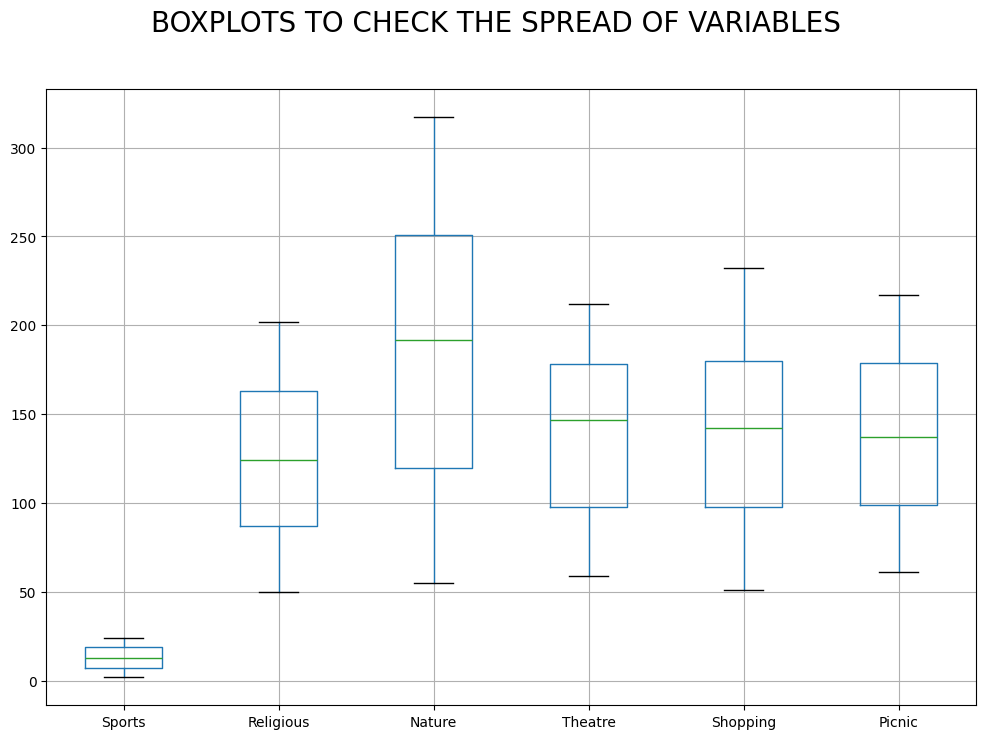

In [7]:
data.boxplot(figsize = (12,8), grid = True)
plt.suptitle('BOXPLOTS TO CHECK THE SPREAD OF VARIABLES', size = 20)

## Question-1: Do you find any difference in the scale of the variables? Is there an exception? Write your observations from the boxplots.

## Lets check the co-relation matrix to understand the relationships

In [18]:
plt.figure(figsize = (10,8) )
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

## Question-2: What patterns do you observe here? What insights can you draw from the exploratory data analysis so far?

In [21]:
from sklearn.preprocessing import MinMaxScaler

data_copy = data[:]
scaler = MinMaxScaler()
data_copy[data_copy.columns] = scaler.fit_transform(data_copy)

## Question-3: What did we do here? Why did we do it? 

### `Hopkins Statistic`

In [28]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins_statistic(X):
    d = X.shape[1]  # Number of features
    n = X.shape[0]  # Number of samples
    m = max(int(0.1 * n), 1)  # Ensure at least one sample is taken

    # Convert to NumPy array if using Pandas
    X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X

    # Fit Nearest Neighbors Model
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_np)

    # Select m random indices
    rand_X = sample(range(n), m)

    ujd = []  # Distance for synthetic points
    wjd = []  # Distance for real points

    for j in range(m):
        synthetic_point = uniform(np.min(X_np, axis=0), np.max(X_np, axis=0), size=(1, d))

        # Compute nearest-neighbor distances
        u_dist, _ = nbrs.kneighbors(synthetic_point)
        ujd.append(u_dist[0][0])  # Distance for synthetic sample

        w_dist, _ = nbrs.kneighbors(X_np[rand_X[j]].reshape(1, -1))
        wjd.append(w_dist[0][0])  # Distance for real sample

    # Calculate Hopkins Statistic
    H = sum(ujd) / (sum(ujd) + sum(wjd))

    if isnan(H):
        print("Warning: NaN encountered in Hopkins calculation.")
        H = 0

    return H

# Example usage (apply this to your dataset)
df = pd.DataFrame(np.random.rand(249, 6))  # Sample dataset with 249 rows, 6 features
H_stat = hopkins_statistic(df)
print(f"Hopkins Statistic: {H_stat:.4f}")


Hopkins Statistic: 1.0000


In [32]:
my_hopkins(data_copy)

## Question-4: According to Hopkins Statistic is there cluster tendency in the data?

## Model building - KMeans

In [ ]:
from sklearn.cluster import KMeans

### Choosing K by comparing Cost against each K¶

In [ ]:
import pylab as pl
number_of_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(data_copy).score(data_copy) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## According to the Elbow Curve the optimum No of Clusters is 2. But, your management plans 3 different types of incentives to give to the customers. Hence we will be running K-Means with number of clusters as 3

## Question-5: Write the code for creating the KMeans clusters with number of clusters = 3.

### Hint: Use the function KMeans(n_clusters= no. of clusters ,max_iter=1000,random_state=42)

### Combining the predicted clusters with the original DF.¶

In [ ]:
km = # Answer 5 :Cluster creation code
fitClusters = km.fit_predict(data_copy)

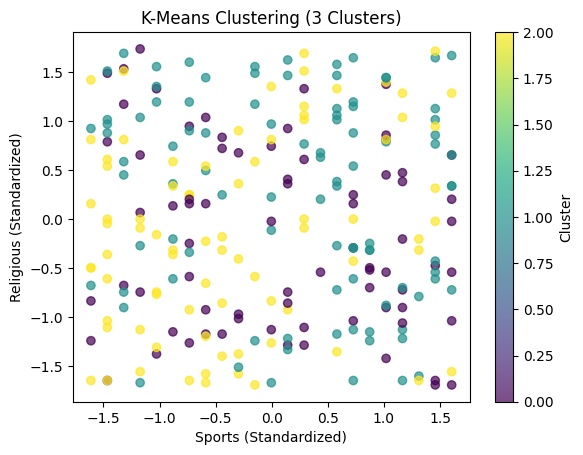

   Sports  Religious  Nature  Theatre  Shopping  Picnic  Cluster
0      14        190     216      137        71      93        1
1      18        176     167       76       134      92        1
2      17        195     128      110       120     137        1
3      19        111     243       93       120     145        1
4      10        162     164      152       180      65        0


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = {
    "Sports": np.random.randint(2, 25, size=249),
    "Religious": np.random.randint(50, 203, size=249),
    "Nature": np.random.randint(52, 318, size=249),
    "Theatre": np.random.randint(59, 213, size=249),
    "Shopping": np.random.randint(50, 233, size=249),
    "Picnic": np.random.randint(61, 218, size=249)
}

df = pd.DataFrame(data)

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1000)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualizing clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Sports (Standardized)")
plt.ylabel("Religious (Standardized)")
plt.title("K-Means Clustering (3 Clusters)")
plt.colorbar(label="Cluster")
plt.show()

# Display cluster assignments
print(df.head())


In [ ]:
copy_2 = data_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
data['k_mean_pred'] = fitClusters
clustersDf.columns = ['k_mean_pred']
combinedDf = pd.concat([copy_2, clustersDf], axis = 1)
combinedDf.set_index('Emp Id',inplace = True)
combinedDf.head()

In [4]:
print(type(data))


<class 'dict'>


In [6]:
import pandas as pd

data = pd.DataFrame.from_dict(data)


## Analysing the segments based on the clusters created by K-means clustering Model

## Now that the segments have been created, we need to profile each segment for reporting

## Question-6: What are the major differences between Employee Segment 0 and Employee Segment 1?

In [ ]:
#Answer 6 :
Potential Differences Between Employee Segments
1 Demographics & Background
- Segment 0 may consist of junior-level employees, recent hires, or a specific department.
- Segment 1 might represent senior employees, experienced professionals, or leadership roles.
2 Performance & Engagement
- Segment 0 could have higher turnover rates or varying productivity levels.
- Segment 1 may have greater job stability with consistent performance.
3 Work Preferences & Benefits
- Employees in Segment 0 may prioritize growth opportunities, learning, and flexible work schedules.
- Employees in Segment 1 might focus on job security, leadership roles, and higher compensation.
4 Skill & Training Needs- Segment 0 may require onboarding and technical training.
- Segment 1 could be more self-sufficient, focusing on strategic decision-making.
5 Satisfaction & Retention
- If Segment 0 has lower satisfaction scores, strategies may be needed to improve engagement.
- Segment 1 may have higher retention rates due to stability and long-term career progression.


## Question-7: Which of the employee segments does not show much interest in any kind of leisure activity or entertainment ?

In [ ]:
#Answer 7:
Employee segment 1 does not have much interest in any kind of leisure activity or entertainment
- Cluster 0 shows lower participation in Sports (10), Picnic (65), and slightly higher numbers for Shopping (180) and Theatre (152).
